In [17]:
from matplotlib import pyplot as plt
import numpy as np
import scipy.sparse as sp

In [27]:
def Hamiltonian(Ec, Ej, ng, nmax=10):

    n = np.arange(-nmax, nmax+1)
    N = sp.diags([n], [0], (2*nmax+1, 2*nmax+1))
    I = sp.eye(2*nmax+1)
    H = 4 * Ec * (N - ng * I) @ (N - ng * I)
    e = np.ones(2*nmax+1)
    sup = sp.diags([e], [1], (2*nmax+1, 2*nmax+1))
    sdown = sup.T
    H = 4 * Ec * (N - ng * I) @ (N - ng * I) - (Ej/2) * (sup + sdown)
    return H

H = Hamiltonian(1, 10, 0, nmax=3)

In [28]:
E, U = np.linalg.eigh(H.todense())

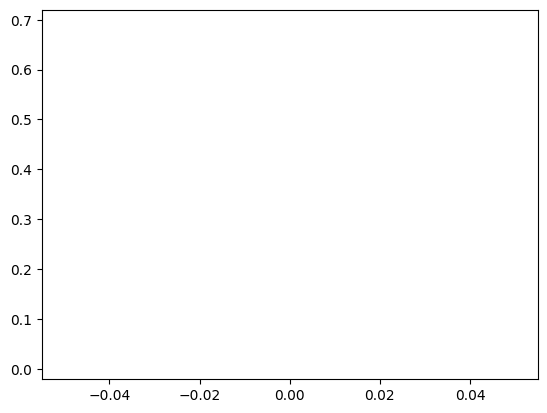

In [29]:
fig, ax = plt.subplots()
ax.plot(np.abs(U[0]), label=r'$\Psi_0$')
ax.plot(np.abs(U[1]), label=r'$\Psi_1$')

In [30]:
def expt_0(EC: float, EJ: float):
    ng = np.linspace(0.25, 0.75)
    E = []
    for ng_i in ng:
        H = Hamiltonian(EC, EJ, ng_i, nmax=10)
        energies, _ = np.linalg.eigh(H.todense())
        energies = np.sort(energies)

        E.append(energies[:4])

    fig, ax = plt.subplots()
    ax.plot(ng, np.asarray(E))
    ax.set_xlabel(r'$n_g$')

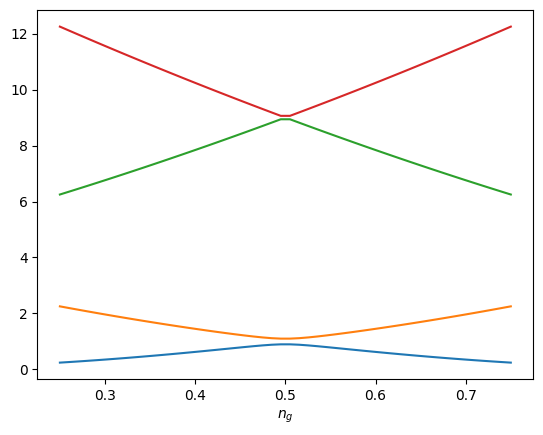

In [31]:
expt_0(EC=1, EJ=0.2)

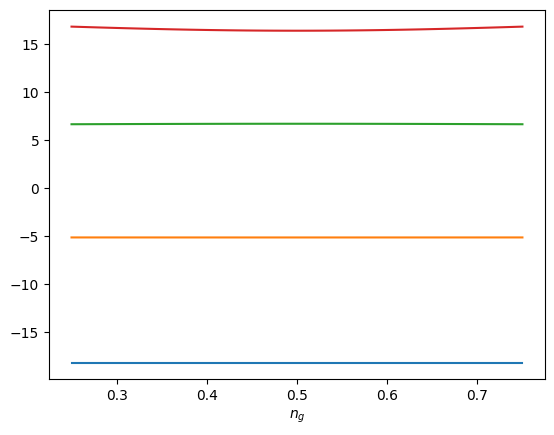

In [32]:
expt_0(EC=1, EJ=25)

In [ ]:
def expt_1(EC: float, EJ: float):
    ng = np.linspace(0.25, 0.75)
    E = []
    for ng_i in ng:
        H = Hamiltonian(EC, EJ, ng_i, nmax=10)
        energies, _ = np.linalg.eigh(H.todense())
        energies = np.sort(energies)

        E.append(energies[:4])

    fig, ax = plt.subplots()
    ax.plot(ng, np.asarray(E))
    ax.set_xlabel(r'$n_g$')